In [120]:
import math
import numpy as np
import pandas as pd
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas.plotting import scatter_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

#from sklearn.externals.joblib import dump
#from sklearn.externals.joblib import load
#from sklearn.feature_selection import RFE

from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

# Create one random seed number for reproducible results
seedNum = 888

# Libraries for neural network
import tensorflow
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

In [121]:
outlier_flag = True      # Will threshold the outliers to outlier_max_value value
outlier_max_value = 20000
scale_flag = True
scale_cols=['n_tokens_title','average_token_length']

In [122]:
# Display all columns in pandas
pd.set_option('display.max_columns', None)

### Reading data

In [123]:
inputFile = '../data/output/OnlineNewsPopularity_featureEngg_RAW.csv' #Kannan stiched this file
df = read_csv(inputFile)
df.columns = df.columns.str.replace(' ','')
print(df.shape)
df.head()

(7795, 181)


,Id,url,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,is__Monday,is__Tuesday,is__Wednesday,is__Thursday,is__Friday,is__Saturday,is__Sunday,is_Weekend,polarity_title,subjectivity_title,polarity_content,subjectivity_content,LDA_T0,LDA_T1,LDA_T2,LDA_T3,LDA_T4,LDA_T5,LDA_T6,LDA_T7,LDA_T8,LDA_T9,NMF_T0,NMF_T1,NMF_T2,NMF_T3,NMF_T4,NMF_T5,NMF_T6,NMF_T7,NMF_T8,NMF_T9,LSI_T0,LSI_T1,LSI_T2,LSI_T3,LSI_T4,LSI_T5,LSI_T6,LSI_T7,LSI_T8,LSI_T9,LDA_C0,LDA_C1,LDA_C2,LDA_C3,LDA_C4,LDA_C5,LDA_C6,LDA_C7,LDA_C8,LDA_C9,NMF_C0,NMF_C1,NMF_C2,NMF_C3,NMF_C4,NMF_C5,NMF_C6,NMF_C7,NMF_C8,NMF_C9,LSI_C0,LSI_C1,LSI_C2,LSI_C3,LSI_C4,LSI_C5,LSI_C6,LSI_C7,LSI_C8,LSI_C9,LDA_K0,LDA_K1,LDA_K2,LDA_K3,LDA_K4,LDA_K5,LDA_K6,LDA_K7,LDA_K8,LDA_K9,NMF_K0,NMF_K1,NMF_K2,NMF_K3,NMF_K4,NMF_K5,NMF_K6,NMF_K7,NMF_K8,NMF_K9,LSI_K0,LSI_K1,LSI_K2,LSI_K3,LSI_K4,LSI_K5,LSI_K6,LSI_K7,LSI_K8,LSI_K9,keywords_pca_0,keywords_pca_1,keywords_pca_2,keywords_pca_3,keywords_pca_4,keywords_pca_5,keywords_pca_6,keywords_pca_7,keywords_pca_8,keywords_pca_9,content_pca_0,content_pca_1,content_pca_2,content_pca_3,content_pca_4,content_pca_5,content_pca_6,content_pca_7,content_pca_8,content_pca_9,NER_list_pca_0,NER_list_pca_1,NER_list_pca_2,NER_list_pca_3,NER_list_pca_4,NER_list_pca_5,NER_list_pca_6,NER_list_pca_7,NER_list_pca_8,NER_list_pca_9,NER_most_common_pca_0,NER_most_common_pca_1,NER_most_common_pca_2,NER_most_common_pca_3,NER_most_common_pca_4,NER_most_common_pca_5,NER_most_common_pca_6,NER_most_common_pca_7,NER_most_common_pca_8,NER_most_common_pca_9,NER_GPE,NER_DATE,NER_CARDINAL,NER_NORP,NER_PERSON,NER_TIME,NER_ORG,NER_WORK_OF_ART,NER_QUANTITY,NER_EVENT,NER_ORDINAL,NER_MONEY,NER_FAC,NER_PRODUCT,NER_LAW,NER_PERCENT,NER_LOC,NER_LANGUAGE,keyword_predicted_shares,shares
0,1,http://mashable.com/2014/09/01/americans-held-...,10,261,0.661355,1.0,0.787500,7,3,1,1,4.873563,7,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0.000,0.00,0.013542,0.390972,0.016667,0.850000,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.000000,0.000000,0.000347,0.005389,0.000000,0.000000,0.031868,0.000839,0.0,0.006422,0.007722,0.008535,0.021316,0.071012,0.020690,-0.006088,0.077717,-0.036213,-0.093264,0.063072,0.010489,0.060015,0.525275,0.000248,0.245409,0.045961,0.073107,0.000248,0.000248,0.039002,0.000000,0.000000,0.0,0.000000,0.077731,0.000000,0.922646,0.000000,0.050830,0.001072,9.623199,-6.378529,-4.692613,-8.613729,1.092459,-2.644242,-1.702526,-2.527858,-6.794291,-1.087015,0.025000,0.025000,0.774985,0.025001,0.025000,0.025015,0.025000,0.025000,0.025000,0.025000,0.163539,0.00000,0.000000,0.000000,0.00000,0.0,0.0,0.115788,0.000000,0.00564,1.337092,-0.312890,-0.075334,0.014332,-0.026212,-0.018623,0.147240,-0.247019,0.028334,0.013849,13.136436,-0.564639,-0.715556,-0.365038,0.279909,-0.919380,0.012948,-0.423773,-0.529433,-0.417151,20.136116,20.801281,-8.014767,-13.831778,16.490318,-9.784305,2.202778,8.778829,7.295693,10.242371,71.769478,-0.305974,2.390489,-2.477139,0.053204,-0.480504,0.319525,0.988350,-0.227759,1.380270,2.266807,0.527735,2.283769,-0.651834,-0.229780,0.212919,0.560122,-0.467169,0.234052,-0.722619,37,16,5,10,9,2,7,1,1,0,0,0,0,0,0,0,0,0,2112,1100
1,2,http://mashable.com/2014/09/01/apple-visa-mast...,7,1791,0.370242,1.0,0.535038,74,3,50,0,4.554439,8,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.000,0.00,0.056136,0.518788,0.016667,0.016668,0.016667,0.016667,0.849998,0.016667,0.016667,0.016667,0.016667,0.016667,0.000000,0.210957,0.000000,0.000000,0.000000,0.000000,0.000000,0.273793,0.0,0.000000,0.201676,1.093307,-0.089313,-0.070620,-0.046514,-0.031308,0.133592,0.769232,-0.017455,-0.096662,0.775230,0.143104,0.076322,0.000764,0.000763,0.000764,0.000763,0.000764,0.000763,0.000764,0.042443,0.305919,0.0,0.004741,0.000000,0.000609,0.003877,0.037248,0.002414,0.080931

In [124]:
#Selected features through ensemble feature significance scoring
f_feature_ranking=open('../data/output/Feature_ranking_Selected.txt')
selected_features = f_feature_ranking.read().split('\n')
selected_features

['Id',
 'url',
 'data_channel_is_world',
 'average_token_length',
 'data_channel_is_entertainment',
 'n_unique_tokens',
 'n_non_stop_words',
 'data_channel_is_bus',
 'data_channel_is_lifestyle',
 'num_keywords',
 'data_channel_is_tech',
 'data_channel_is_socmed',
 'LDA_C5',
 'keywords_pca_2',
 'LSI_K6',
 'LDA_C6',
 'is__Friday',
 'LDA_T7',
 'subjectivity_content',
 'num_imgs',
 'n_non_stop_unique_tokens',
 'LSI_K5',
 'LDA_K5',
 'LSI_T9',
 'NER_most_common_pca_8',
 'NER_most_common_pca_5',
 'NER_list_pca_9',
 'keywords_pca_6',
 'LDA_K6',
 'LDA_T3',
 'NER_list_pca_7',
 'LSI_T1',
 'n_tokens_title',
 'num_hrefs',
 'NMF_C4',
 'LDA_K0',
 'is_Weekend',
 'keywords_pca_5',
 'LDA_C1',
 'is__Tuesday',
 'NER_most_common_pca_2',
 'keywords_pca_0',
 'LSI_T7',
 'keywords_pca_7',
 'LSI_C1',
 'NER_LOC',
 'NER_LANGUAGE',
 'LSI_K0',
 'LSI_C0',
 'LDA_T9',
 'NER_PERCENT',
 'NMF_C7',
 'content_pca_1',
 'LSI_K9',
 'NER_TIME',
 'NER_PRODUCT',
 'keywords_pca_3',
 'LDA_K1',
 'NER_list_pca_4',
 'LSI_T6',
 'NER_W

In [125]:
df=df[selected_features]

In [126]:
# Dropping useless attributes
df.drop('url', axis=1, inplace=True)
df.drop('Id', axis=1, inplace=True)

In [127]:
# variables for total columns, total input attributes, target column index and renaming target variable
totCol = len(df.columns)
totAttr = totCol-1
targetCol = totCol #last column
df.rename(columns={'shares': 'targetVar'}, inplace=True)

In [128]:
# Threshold the value > outlier_max_value to value outlier_max_value itself in column shares or targetVar
if outlier_flag:
    print(df[(df['targetVar'] == outlier_max_value)].shape)
    print(df[(df['targetVar'] > outlier_max_value)].shape)
    df['targetVar'] = df['targetVar'].clip(upper = outlier_max_value)
    print(df[(df['targetVar'] == outlier_max_value)].shape)
    print("shape is: ",df.shape)

(0, 117)
(147, 117)
(147, 117)
shape is:  (7795, 117)


In [129]:
#70:30 train test split
if targetCol == totCol :
    x_df = df.iloc[:,0:totAttr]
    y_df = df.iloc[:,totAttr]
else :
    x_df = df.iloc[:,1:totCol]
    y_df = df.iloc[:,0]

validation_size = 0.30
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=validation_size, random_state=seedNum)
print("x_df.shape: {} y_df.shape: {}".format(x_df.shape, y_df.shape))
print("x_train.shape: {} y_train.shape: {}".format(x_train.shape, y_train.shape))
print("x_test.shape: {} y_test.shape: {}".format(x_test.shape, y_test.shape))

x_df.shape: (7795, 116) y_df.shape: (7795,)
x_train.shape: (5456, 116) y_train.shape: (5456,)
x_test.shape: (2339, 116) y_test.shape: (2339,)


In [130]:
# visualization configs
dispCol = 3
if totAttr % dispCol == 0 :
    dispRow = totAttr // dispCol
else :
    dispRow = (totAttr // dispCol) + 1
    
# Set figure width to 16 and height to 12 (4:3 aspect ratio)
fig_size = pyplot.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 12
pyplot.rcParams["figure.figsize"] = fig_size

In [131]:
#kannan: This is decided from feature engineering / feature selection
lowAttributes=[]

In [132]:
# Removing the unselected attributes from the training and validation dataframes
#xy_train <- xy_train[, !(names(xy_train) %in% lowAttributes)]
#xy_test <- xy_test[, !(names(xy_test) %in% lowAttributes)]
xy_newdf = df.drop(lowAttributes, axis=1)

totCol = len(xy_newdf.columns)
totAttr = totCol-1
targetCol = totCol
#array = xy_newdf.values

if targetCol == totCol :
    #x_newdf = array[:,0:totAttr]
    #y_newdf = array[:,totAttr]
    x_newdf = xy_newdf.iloc[:,0:totAttr]
    y_newdf = xy_newdf.iloc[:,totAttr]

else :
    #x_newdf = array[:,1:totCol]
    #y_newdf = array[:,0]
    x_newdf = xy_newdf.iloc[:,1:totCol]
    y_newdf = xy_newdf.iloc[:,0]

validation_size = 0.30
x_train, x_test, y_train, y_test = train_test_split(x_newdf, y_newdf, test_size=validation_size, random_state=seedNum)
print("x_newdf.shape: {} y_newdf.shape: {}".format(x_newdf.shape, y_newdf.shape))
print("x_train.shape: {} y_train.shape: {}".format(x_train.shape, y_train.shape))
print("x_test.shape: {} y_test.shape: {}".format(x_test.shape, y_test.shape))

x_newdf.shape: (7795, 116) y_newdf.shape: (7795,)
x_train.shape: (5456, 116) y_train.shape: (5456,)
x_test.shape: (2339, 116) y_test.shape: (2339,)


In [133]:
x_train.head()

,data_channel_is_world,average_token_length,data_channel_is_entertainment,n_unique_tokens,n_non_stop_words,data_channel_is_bus,data_channel_is_lifestyle,num_keywords,data_channel_is_tech,data_channel_is_socmed,LDA_C5,keywords_pca_2,LSI_K6,LDA_C6,is__Friday,LDA_T7,subjectivity_content,num_imgs,n_non_stop_unique_tokens,LSI_K5,LDA_K5,LSI_T9,NER_most_common_pca_8,NER_most_common_pca_5,NER_list_pca_9,keywords_pca_6,LDA_K6,LDA_T3,NER_list_pca_7,LSI_T1,n_tokens_title,num_hrefs,NMF_C4,LDA_K0,is_Weekend,keywords_pca_5,LDA_C1,is__Tuesday,NER_most_common_pca_2,keywords_pca_0,LSI_T7,keywords_pca_7,LSI_C1,NER_LOC,NER_LANGUAGE,LSI_K0,LSI_C0,LDA_T9,NER_PERCENT,NMF_C7,content_pca_1,LSI_K9,NER_TIME,NER_PRODUCT,keywords_pca_3,LDA_K1,NER_list_pca_4,LSI_T6,NER_WORK_OF_ART,LDA_K7,is__Sunday,LSI_K4,LSI_T4,LDA_T0,LSI_C6,LDA_K2,NER_GPE,is__Thursday,content_pca_9,NMF_K6,content_pca_3,NER_most_common_pca_1,LDA_C0,NER_CARDINAL,LSI_T2,is__Saturday,LDA_K3,LDA_T2,LDA_T4,LDA_C3,LSI_K8,content_pca_7,NER_DATE,NER_list_pca_2,LDA_T8,LDA_T6,is__Wednesday,num_self_hrefs,content_pca_2,LDA_C8,content_pca_5,LSI_C9,LDA_T5,NMF_T7,NMF_T1,LDA_K8,NMF_T8,LDA_K9,NMF_K2,LSI_T0,num_videos,content_pca_8,LSI_C8,LSI_T5,keyword_predicted_shares,NMF_T4,NMF_T3,NMF_C8,NMF_C3,NMF_T2,LDA_T1,NMF_K0,NMF_C0,NMF_T6,NMF_T5,NMF_C9
5616,0,4.303030,0,0.572917,1.0,1,0,6,0,0,0.084525,1.683136,0.148457,0.027686,1,0.262501,0.461524,1,0.724138,-0.729680,0.014286,-0.159242,0.640023,0.391160,0.772029,0.879314,0.562721,0.012500,-1.408446,0.065998,12,5,0.000000,0.014286,0,0.011106,0.001450,0,0.196828,-5.959097,-0.047286,-0.486422,0.121234,0,0,0.415018,1.433652,0.262502,0,0.054749,3.952612,-0.367599,0,1,-1.587634,0.014286,0.646328,-0.111046,2,0.014286,0,-0.093395,-0.239969,0.012500,-0.195994,0.014286,0,0,3.544125,0.000000,9.393019,9.603681,0.076663,1,1.950709,0,0.014287,0.012500,0.012500,0.393382,-0.046274,-4.970053,3,-1.113329,0.012500,0.012500,0,2,1.028442,0.083131,-1.970480,-0.405451,0.262499,0.0,0.000000,0.322990,0.000000,0.014287,0.000000,0.247683,0,-2.733341,0.471106,-0.029557,2562,0.000000,0.000000,0.000000,0.000000,0.485745,0.137497,0.000000,0.017522,0.000000,0.000000,0.015779
6870,0,4.775157,0,0.481178,1.0,0,0,9,0,0,0.000510,-1.069448,0.143015,0.075641,0,0.157143,0.312681,15,0.628205,-0.021725,0.619997,-0.880668,-0.598910,-1.165734,-1.159845,0.066486,0.020000,0.014286,0.828463,0.061472,10,28,0.000000,0.020000,0,0.090239,0.449896,0,0.535428,3.925468,-0.490399,0.224716,0.244213,1,0,1.335836,6.180570,0.014286,0,0.006044,-4.035719,-0.026151,0,1,-0.406518,0.220000,0.542870,0.958502,1,0.020000,0,-0.018187,0.235617,0.299999,-0.387230,0.020002,6,1,-2.756048,0.000000,-19.935139,10.047768,0.234999,0,0.101351,0,0.020000,0.157141,0.014286,0.000510,-0.039191,-1.736734,5,-0.706181,0.300002,0.014286,0,14,23.265581,0.000510,-5.904046,-4.531420,0.014286,0.0,0.000000,0.020000,0.624836,0.020000,0.000000,0.080466,0,-13.224283,-1.886967,-0.161890,2068,0.000000,0.005282,0.000217,0.000000,0.000000,0.014286,0.162353,0.000419,0.000000,0.000000,0.430436
6352,0,4.783333,0,0.726496,1.0,1,0,10,0,0,0.000699,-0.834234,-0.085464,0.000699,0,0.366666,0.645195,1,0.866667,-0.069822,0.033333,0.014667,0.474450,0.971018,-0.627926,0.131379,0.033333,0.366668,-1.018463,0.015278,9,4,0.000000,0.033338,0,0.627788,0.278907,0,1.649384,-6.478974,-0.036300,-0.254197,1.395708,0,0,0.026843,2.922663,0.033333,0,0.067765,-10.712171,-0.008575,0,0,-1.079925,0.699996,1.722503,0.035408,0,0.033333,0,0.905675,0.011830,0.033333,0.470343,0.033333,0,1,-0.983151,0.000000,-7.684834,9.150861,0.530777,3,0.016633,0,0.033333,0.033333,0.033333,0.000699,0.067438,8.041782,3,0.305956,0.033333,0.033333,0,3,11.687694,0.000699,3.988569,-1.682952,0.033333,0.0,0.001749,0.033333,0.008057,0.033333,0.000000,0.020017,1,-5.838991,0.002288,0.007092,2489,0.000000,0.000000,0.000000,0.019501,0.002203,0.033333,0.000000,0.039904,0.006486,0.001350,0.146939
2223,0,4.079777,1,0.360377,1.0,0,0,6,0,0,0.000144,-1.195813,0.106912,0.000143,0,0.033333,0.515092,9,0.522766,0.115269,0.016680

In [134]:
x_test.head()

,data_channel_is_world,average_token_length,data_channel_is_entertainment,n_unique_tokens,n_non_stop_words,data_channel_is_bus,data_channel_is_lifestyle,num_keywords,data_channel_is_tech,data_channel_is_socmed,LDA_C5,keywords_pca_2,LSI_K6,LDA_C6,is__Friday,LDA_T7,subjectivity_content,num_imgs,n_non_stop_unique_tokens,LSI_K5,LDA_K5,LSI_T9,NER_most_common_pca_8,NER_most_common_pca_5,NER_list_pca_9,keywords_pca_6,LDA_K6,LDA_T3,NER_list_pca_7,LSI_T1,n_tokens_title,num_hrefs,NMF_C4,LDA_K0,is_Weekend,keywords_pca_5,LDA_C1,is__Tuesday,NER_most_common_pca_2,keywords_pca_0,LSI_T7,keywords_pca_7,LSI_C1,NER_LOC,NER_LANGUAGE,LSI_K0,LSI_C0,LDA_T9,NER_PERCENT,NMF_C7,content_pca_1,LSI_K9,NER_TIME,NER_PRODUCT,keywords_pca_3,LDA_K1,NER_list_pca_4,LSI_T6,NER_WORK_OF_ART,LDA_K7,is__Sunday,LSI_K4,LSI_T4,LDA_T0,LSI_C6,LDA_K2,NER_GPE,is__Thursday,content_pca_9,NMF_K6,content_pca_3,NER_most_common_pca_1,LDA_C0,NER_CARDINAL,LSI_T2,is__Saturday,LDA_K3,LDA_T2,LDA_T4,LDA_C3,LSI_K8,content_pca_7,NER_DATE,NER_list_pca_2,LDA_T8,LDA_T6,is__Wednesday,num_self_hrefs,content_pca_2,LDA_C8,content_pca_5,LSI_C9,LDA_T5,NMF_T7,NMF_T1,LDA_K8,NMF_T8,LDA_K9,NMF_K2,LSI_T0,num_videos,content_pca_8,LSI_C8,LSI_T5,keyword_predicted_shares,NMF_T4,NMF_T3,NMF_C8,NMF_C3,NMF_T2,LDA_T1,NMF_K0,NMF_C0,NMF_T6,NMF_T5,NMF_C9
4410,0,0.000000,0,0.000000,0.0,0,0,7,0,0,0.000962,-1.506181,0.017577,0.000962,0,0.025000,0.444156,1,0.000000,-0.270376,0.020000,0.004832,-1.673541,0.634915,-1.181179,-0.477734,0.419998,0.025000,-1.607329,0.000963,10,0,0.073466,0.020000,0,-1.243707,0.251981,0,-0.721219,2.371106,-0.000803,0.871323,-0.233713,0,0,0.243160,2.393879,0.275000,0,0.000000,12.256122,0.006398,1,0,-0.174758,0.0200,-0.120420,0.003085,0,0.020002,0,-0.068980,0.002762,0.025000,-0.092690,0.020000,10,0,-3.322369,0.000000,0.642883,12.133107,0.000962,0,0.001380,0,0.419999,0.025000,0.025000,0.294780,-0.008991,9.780233,2,1.068650,0.025000,0.275001,1,0,2.255146,0.000962,-6.413294,0.061507,0.025000,0.000073,0.000000,0.020000,0.000387,0.020000,0.000000,0.000820,1,1.209823,-0.385504,0.000038,2239,0.000050,0.000113,0.000000,0.010815,0.000000,0.274999,0.000000,0.078499,0.000110,0.000218,0.000000
7387,0,4.270968,0,0.584967,1.0,0,0,4,0,1,0.002927,0.113750,-0.018543,0.000208,1,0.025000,0.579851,1,0.793939,0.051074,0.012500,0.026780,0.440065,-1.257425,-1.521343,-0.696985,0.012500,0.025000,-1.249465,0.135102,9,1,0.000000,0.012500,0,-0.341706,0.196733,0,-0.919229,-4.732383,0.014297,-0.067413,11.517425,0,0,0.131337,12.578507,0.025000,0,0.248456,-31.404490,-0.077612,2,0,0.268086,0.0125,0.956732,0.082142,1,0.012500,0,-0.100717,0.033104,0.025000,1.835699,0.142406,1,0,-6.938231,0.026849,6.972684,-4.320701,0.731816,7,0.021036,0,0.012500,0.525000,0.275000,0.000208,-0.729159,-11.259977,7,0.983708,0.025000,0.025000,0,0,29.189899,0.020232,6.146254,-11.572372,0.025000,0.010819,0.024619,0.012500,0.005753,0.186105,0.048875,0.042916,2,10.475517,4.876117,-0.025759,2603,0.001523,0.000000,0.000000,0.000000,0.000000,0.025000,0.000000,0.000000,0.001876,0.000000,1.242514
4532,0,4.661804,1,0.575419,1.0,0,0,8,0,0,0.044714,0.365328,0.198768,0.099516,0,0.033333,0.269378,1,0.727273,0.029154,0.387503,0.008461,-0.149268,-1.302619,-0.789655,0.291205,0.137494,0.033333,0.608276,0.023149,10,27,0.013681,0.012500,0,-0.444127,0.645078,0,0.336521,5.246181,-0.076533,-0.364850,-0.595315,0,0,1.371573,2.270466,0.033333,2,0.049002,5.190913,-0.019883,0,0,-0.499658,0.0125,-1.251123,0.100118,0,0.262502,0,-0.014805,0.005119,0.033333,1.058110,0.012502,7,1,-13.970898,0.012905,-8.796712,7.784821,0.021588,9,0.018780,0,0.012500,0.700000,0.033333,0.080354,0.002854,9.457913,12,-4.070135,0.033333,0.033333,0,4,2.919482,0.000763,8.351804,-0.256960,0.033333,0.000000,0.000896,0.137499,0.015787,0.012500,0.000987,0.026545,21,3.421950,-0.043650,-0.006720,2680,0.000000,0.005998,0.092842,0.011685,0.000204,0.033333,0.163014,0.025214,0.019949,0.000000,0.010424
5493,0,4.474490,0,0.514184,1.0,0,0,5,0,0,0.000794,0.081749,-0.056991,0.000794,0,0.025000,0.461640,1,0.655271,0.04036

In [135]:
#scale_cols=['n_tokens_title','average_token_length']

In [136]:
if scale_flag:
    
    def scale_trn(df, columns):
        for col in columns:
            df[col] = (df[col] - df[col].mean())/df[col].std(ddof=0) 
        return df

    def scale_tst(df, df_trn_tmp, columns):
        for col in columns:
            df[col] = (df[col] - df_trn_tmp[col].mean())/df_trn_tmp[col].std(ddof=0) 
        return df
    
    x_train = scale_trn(x_train.copy(), scale_cols)
    x_test  = scale_tst(x_test.copy(), x_train.copy(), scale_cols)

In [137]:
x_train.head()

,data_channel_is_world,average_token_length,data_channel_is_entertainment,n_unique_tokens,n_non_stop_words,data_channel_is_bus,data_channel_is_lifestyle,num_keywords,data_channel_is_tech,data_channel_is_socmed,LDA_C5,keywords_pca_2,LSI_K6,LDA_C6,is__Friday,LDA_T7,subjectivity_content,num_imgs,n_non_stop_unique_tokens,LSI_K5,LDA_K5,LSI_T9,NER_most_common_pca_8,NER_most_common_pca_5,NER_list_pca_9,keywords_pca_6,LDA_K6,LDA_T3,NER_list_pca_7,LSI_T1,n_tokens_title,num_hrefs,NMF_C4,LDA_K0,is_Weekend,keywords_pca_5,LDA_C1,is__Tuesday,NER_most_common_pca_2,keywords_pca_0,LSI_T7,keywords_pca_7,LSI_C1,NER_LOC,NER_LANGUAGE,LSI_K0,LSI_C0,LDA_T9,NER_PERCENT,NMF_C7,content_pca_1,LSI_K9,NER_TIME,NER_PRODUCT,keywords_pca_3,LDA_K1,NER_list_pca_4,LSI_T6,NER_WORK_OF_ART,LDA_K7,is__Sunday,LSI_K4,LSI_T4,LDA_T0,LSI_C6,LDA_K2,NER_GPE,is__Thursday,content_pca_9,NMF_K6,content_pca_3,NER_most_common_pca_1,LDA_C0,NER_CARDINAL,LSI_T2,is__Saturday,LDA_K3,LDA_T2,LDA_T4,LDA_C3,LSI_K8,content_pca_7,NER_DATE,NER_list_pca_2,LDA_T8,LDA_T6,is__Wednesday,num_self_hrefs,content_pca_2,LDA_C8,content_pca_5,LSI_C9,LDA_T5,NMF_T7,NMF_T1,LDA_K8,NMF_T8,LDA_K9,NMF_K2,LSI_T0,num_videos,content_pca_8,LSI_C8,LSI_T5,keyword_predicted_shares,NMF_T4,NMF_T3,NMF_C8,NMF_C3,NMF_T2,LDA_T1,NMF_K0,NMF_C0,NMF_T6,NMF_T5,NMF_C9
5616,0,0.025244,0,0.572917,1.0,1,0,6,0,0,0.084525,1.683136,0.148457,0.027686,1,0.262501,0.461524,1,0.724138,-0.729680,0.014286,-0.159242,0.640023,0.391160,0.772029,0.879314,0.562721,0.012500,-1.408446,0.065998,0.411743,5,0.000000,0.014286,0,0.011106,0.001450,0,0.196828,-5.959097,-0.047286,-0.486422,0.121234,0,0,0.415018,1.433652,0.262502,0,0.054749,3.952612,-0.367599,0,1,-1.587634,0.014286,0.646328,-0.111046,2,0.014286,0,-0.093395,-0.239969,0.012500,-0.195994,0.014286,0,0,3.544125,0.000000,9.393019,9.603681,0.076663,1,1.950709,0,0.014287,0.012500,0.012500,0.393382,-0.046274,-4.970053,3,-1.113329,0.012500,0.012500,0,2,1.028442,0.083131,-1.970480,-0.405451,0.262499,0.0,0.000000,0.322990,0.000000,0.014287,0.000000,0.247683,0,-2.733341,0.471106,-0.029557,2562,0.000000,0.000000,0.000000,0.000000,0.485745,0.137497,0.000000,0.017522,0.000000,0.000000,0.015779
6870,0,0.367743,0,0.481178,1.0,0,0,9,0,0,0.000510,-1.069448,0.143015,0.075641,0,0.157143,0.312681,15,0.628205,-0.021725,0.619997,-0.880668,-0.598910,-1.165734,-1.159845,0.066486,0.020000,0.014286,0.828463,0.061472,-0.512540,28,0.000000,0.020000,0,0.090239,0.449896,0,0.535428,3.925468,-0.490399,0.224716,0.244213,1,0,1.335836,6.180570,0.014286,0,0.006044,-4.035719,-0.026151,0,1,-0.406518,0.220000,0.542870,0.958502,1,0.020000,0,-0.018187,0.235617,0.299999,-0.387230,0.020002,6,1,-2.756048,0.000000,-19.935139,10.047768,0.234999,0,0.101351,0,0.020000,0.157141,0.014286,0.000510,-0.039191,-1.736734,5,-0.706181,0.300002,0.014286,0,14,23.265581,0.000510,-5.904046,-4.531420,0.014286,0.0,0.000000,0.020000,0.624836,0.020000,0.000000,0.080466,0,-13.224283,-1.886967,-0.161890,2068,0.000000,0.005282,0.000217,0.000000,0.000000,0.014286,0.162353,0.000419,0.000000,0.000000,0.430436
6352,0,0.373675,0,0.726496,1.0,1,0,10,0,0,0.000699,-0.834234,-0.085464,0.000699,0,0.366666,0.645195,1,0.866667,-0.069822,0.033333,0.014667,0.474450,0.971018,-0.627926,0.131379,0.033333,0.366668,-1.018463,0.015278,-0.974681,4,0.000000,0.033338,0,0.627788,0.278907,0,1.649384,-6.478974,-0.036300,-0.254197,1.395708,0,0,0.026843,2.922663,0.033333,0,0.067765,-10.712171,-0.008575,0,0,-1.079925,0.699996,1.722503,0.035408,0,0.033333,0,0.905675,0.011830,0.033333,0.470343,0.033333,0,1,-0.983151,0.000000,-7.684834,9.150861,0.530777,3,0.016633,0,0.033333,0.033333,0.033333,0.000699,0.067438,8.041782,3,0.305956,0.033333,0.033333,0,3,11.687694,0.000699,3.988569,-1.682952,0.033333,0.0,0.001749,0.033333,0.008057,0.033333,0.000000,0.020017,1,-5.838991,0.002288,0.007092,2489,0.000000,0.000000,0.000000,0.019501,0.002203,0.033333,0.000000,0.039904,0.006486,0.001350,0.146939
2223,0,-0.136712,1,0.360377,1.0,0,0,6,0,0,0.000144,-1.195813,0.106912,0.000143,0,0.033333,0.515092,9,0.52

In [138]:
if isinstance(x_train, pd.DataFrame):
    x_train = x_train.values
    y_train = y_train.values
    print("train data change from DataFrame to Numpy ")
    
if isinstance(x_test, pd.DataFrame):
    x_test = x_test.values
    y_test = y_test.values
    print("test data change from DataFrame to Numpy ")

train data change from DataFrame to Numpy 
test data change from DataFrame to Numpy 


## Traditional ML Models Evaluation

In [139]:
# Comparing various types of regression # K-fold cross validation
num_folds = 10
scoring = 'neg_mean_squared_error'
#Other scoring options: https://scikit-learn.org/stable/modules/model_evaluation.html
models = []

# LINEAR ALGORITHMS
# -----------------
# Linear Regression
models.append(('LR', LinearRegression()))
# Ridge Regression
models.append(('RR', Ridge(random_state=seedNum)))
# Lasso Regression
models.append(('LASSO', Lasso(random_state=seedNum)))
#models.append(('LASSO', Lasso(alpha=4, max_iter=500, random_state=seedNum)))
# Elastic Net
#models.append(('EN', ElasticNet(alpha=4, l1_ratio=1, max_iter=500, random_state=seedNum)))
models.append(('EN', ElasticNet(random_state=seedNum)))

# NON-LINEAR ALGORITHMS
# ---------------------
# Classification and Regression Trees
models.append(('CART', DecisionTreeRegressor(random_state=seedNum)))
# K Nearest Neighbor
models.append(('KNN', KNeighborsRegressor()))
# Suppor Vector machine
models.append(('SVM', SVR()))

# ENSEMBLE ALGORITHMS
# -------------------
# Extra Trees
models.append(('ETree', ExtraTreesRegressor(random_state=seedNum)))
# Random Forest
models.append(('RF', RandomForestRegressor(random_state=seedNum)))
# Stochastic Gradient Boosting
models.append(('GBM', GradientBoostingRegressor(random_state=seedNum)))
# Adaptive Boosting
models.append(('ABM', AdaBoostRegressor(random_state=seedNum)))

results = []
names = []
metrics1= [] #RMSE_Training
metrics2= [] #RMSE_Testing

## Adding DL Model

In [140]:
def baseline_model(init_mode='uniform', neurons=5, learn_rate=0.001, momentum=0.2, act_function='relu'):
        
    model = Sequential()
    
    model.add(BatchNormalization())
    model.add(Dense(neurons, input_dim=17, kernel_initializer=init_mode, activation=act_function))
    model.add(Dense(6,  kernel_initializer=init_mode, activation=act_function))
    model.add(Dense(1,  kernel_initializer=init_mode))
    
    optimizer = tensorflow.keras.optimizers.RMSprop(lr=learn_rate, momentum=momentum)
    model.compile(loss='mean_squared_error', optimizer=optimizer, )
    
    return model

estimator = KerasRegressor(build_fn=baseline_model, epochs=50, batch_size=10, verbose=0)

In [141]:
models.append(('DL', estimator))

## Training

In [142]:
for name, model in models:
    startTimeModule = datetime.now()
    kfold = KFold(n_splits=num_folds, random_state=seedNum)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    rmse=math.sqrt(abs(cv_results.mean()))
    metrics1.append(rmse)
    print("\n%s: rmse:%f" % (name, rmse))
    print ('Model training time:',(datetime.now() - startTimeModule))


LR: rmse:3263.749391
Model training time: 0:00:00.462211

RR: rmse:3260.945989
Model training time: 0:00:00.291124

LASSO: rmse:3257.148688
Model training time: 0:00:05.118870

EN: rmse:3297.474696
Model training time: 0:00:00.773287

CART: rmse:4836.377477
Model training time: 0:00:19.217826

KNN: rmse:3627.955402
Model training time: 0:00:04.955440

SVM: rmse:3690.295342
Model training time: 0:01:38.572243

ETree: rmse:3342.477813
Model training time: 0:05:21.663873

RF: rmse:3396.786444
Model training time: 0:09:26.851801

GBM: rmse:3366.368873
Model training time: 0:01:25.203407

ABM: rmse:4229.087183
Model training time: 0:00:14.840494

DL: rmse:3288.525666
Model training time: 0:07:25.163547


## Testing

In [143]:
for name, model in models:
    model.fit(x_train, y_train)
    predictions=model.predict(x_test)
    rmse=math.sqrt(mean_squared_error(y_test, predictions))
    metrics2.append(rmse)
    print("\n%s: rmse:%f" % (name, rmse))


LR: rmse:5114.857620

RR: rmse:4802.844401

LASSO: rmse:4414.351580

EN: rmse:3446.491871

CART: rmse:4697.152439

KNN: rmse:3727.419881

SVM: rmse:3862.067428

ETree: rmse:3594.404422

RF: rmse:3787.800349

GBM: rmse:3641.247635

ABM: rmse:3786.745716

DL: rmse:3396.299090


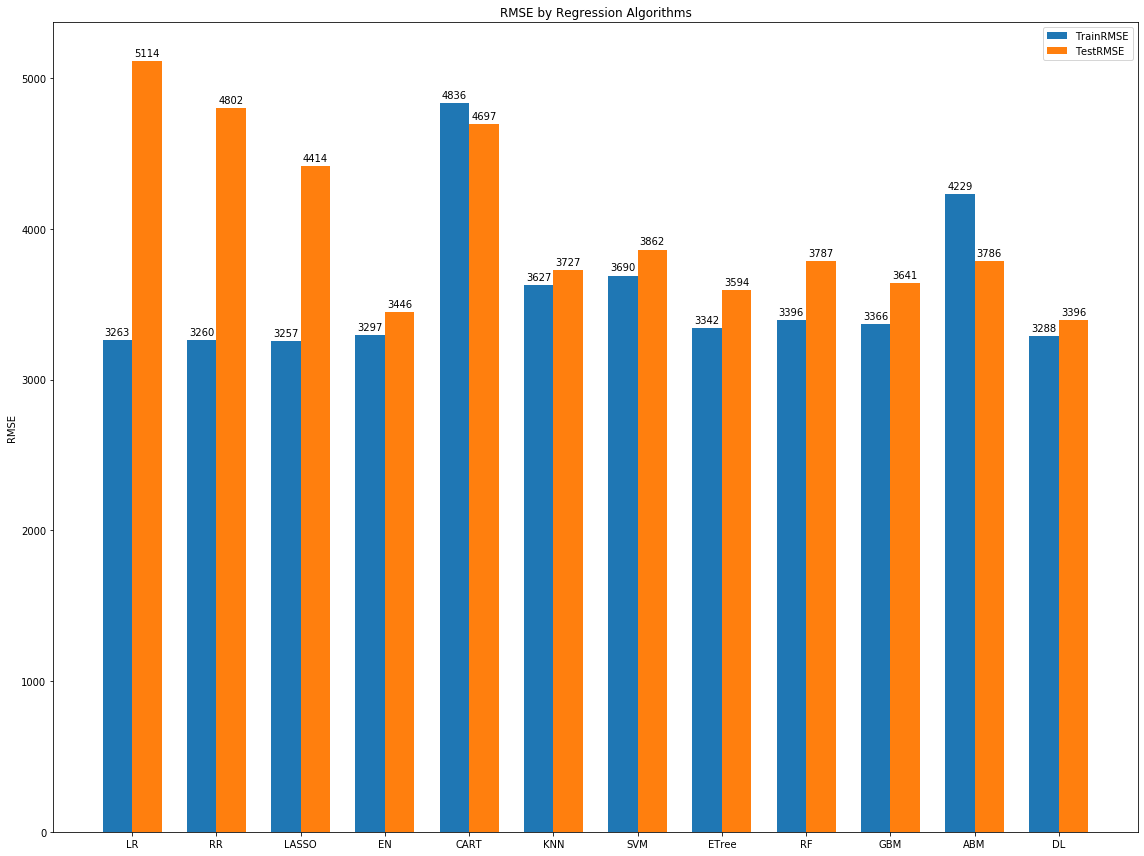

In [144]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = names

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

metrics1=[math.floor(item) for item in metrics1]
metrics2=[math.floor(item) for item in metrics2]

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, metrics1, width, label='TrainRMSE')
rects2 = ax.bar(x + width/2, metrics2, width, label='TestRMSE')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('RMSE')
ax.set_title('RMSE by Regression Algorithms')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [145]:
# Tuning algorithm #1 - ElasticNet
paramGrid1 = dict(alpha=np.array([1,2,3,4,5]),l1_ratio=np.array([0.1,0.5,1]),max_iter=np.array([500]))
model1 = ElasticNet(random_state=seedNum,normalize=False)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid1 = GridSearchCV(estimator=model1, param_grid=paramGrid1, scoring=scoring, cv=kfold)
grid_result1 = grid1.fit(x_train, y_train)

print("Best: %f using %s" % (math.sqrt(abs(grid_result1.best_score_)), grid_result1.best_params_))
results.append(grid_result1.cv_results_['mean_test_score'])
names.append('EN')
means = grid_result1.cv_results_['mean_test_score']
stds = grid_result1.cv_results_['std_test_score']
params = grid_result1.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    #print("%f (%f) with: %r" % (mean, stdev, param))
    print("%f with: %r" % (math.sqrt(abs(mean)), param))


SyntaxError: EOL while scanning string literal (<ipython-input-145-27268d813a7b>, line 13)

In [ ]:
# Tuning algorithm #2 - Lasso
paramGrid1 = dict(alpha=np.array([1,2,3,4,5]),max_iter=np.array([500,1000,1500]))
model1 = Lasso(random_state=seedNum,normalize=False)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid1 = GridSearchCV(estimator=model1, param_grid=paramGrid1, scoring=scoring, cv=kfold)
grid_result1 = grid1.fit(x_train, y_train)

print("Best: %f using %s" % (math.sqrt(abs(grid_result1.best_score_)), grid_result1.best_params_))
results.append(grid_result1.cv_results_['mean_test_score'])
names.append('EN')
means = grid_result1.cv_results_['mean_test_score']
stds = grid_result1.cv_results_['std_test_score']
params = grid_result1.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    #print("%f (%f) with: %r" % (mean, stdev, param))
    print("%f with: %r" % (math.sqrt(abs(mean)), param))


In [ ]:
"""
# Tuning algorithm #2 - Support Vector Machine
paramGrid2 = dict(C=np.array([0.1,1,10]),epsilon=np.array([0.01,0.1,0.5,1]),kernel=np.array(['linear', 'poly', 'rbf', 'sigmoid']))
model2 = SVR()
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid2 = GridSearchCV(estimator=model2, param_grid=paramGrid2, scoring=scoring, cv=kfold)
grid_result2 = grid2.fit(x_train, y_train)

print("Best: %f using %s" % (math.sqrt(abs(grid_result2.best_score_)), grid_result2.best_params_))
results.append(grid_result2.cv_results_['mean_test_score'])
names.append('SVM')
means = grid_result2.cv_results_['mean_test_score']
stds = grid_result2.cv_results_['std_test_score']
params = grid_result2.cv_results_['params']
      
for mean, stdev, param in zip(means, stds, params):
    print("%f with: %r" % (math.sqrt(abs(mean)), param))
    """